<a href="https://colab.research.google.com/github/Ahmetyldrr/Large-Language-Models-LLMs-/blob/main/Chapter9_Moving_Beyond_Foundation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source  : https://learning.oreilly.com/videos/quick-start-guide/9780135384800/9780135384800-QGL2_03_09_00/

# Vision Transformer (ViT)

Vision Transformer (ViT), **Doğal Dil İşleme (NLP)** alanında yaygın olarak kullanılan **Transformer** mimarisini görüntü işleme (örneğin, görüntü sınıflandırma) alanına uyarlayan bir yaklaşımdır. Klasik CNN tabanlı yöntemler yerine, görüntüleri küçük parçalara bölüp (patch) her bir parçayı bir "kelime" gibi değerlendirerek Transformer yapısında işlemek fikrine dayanır.

---

## Temel Fikir

1. **Girdi Resmi Parçalara Ayırma**  
   Girdi olarak aldığımız resmi, belirli boyutlarda (örneğin 16×16 piksellik) sabit büyüklükteki parçalara (patch) bölüyoruz.

2. **Patch’leri Düzleştirme ve Gömme (Embedding)**  
   Her bir parçayı (patch) vektör haline getirir (düzleştirir) ve sonrasında bir **Lineer Projeksiyon** katmanıyla sabit boyutlu bir gömme (embedding) elde ederiz.

3. **Konum (Positional) Bilgisi Ekleme**  
   Transformer mimarisinde, sıralı verinin konum bilgisini koruyabilmek için **positional embedding** kullanırız. Bu sayede her patch’in resimdeki konumu modele aktarılır.

4. **Transformer Encoder**  
   Elde edilen patch gömmeleri bir dizi haline getirilir ve **çoklu-başlıklı (multi-head) dikkat** katmanları, **katman normu (layer normalization)** ve **MLP** bloklarından oluşan klasik Transformer Encoder’a gönderilir.

5. **Sınıflandırma (Classification Head)**  
   Encoder çıktısında özel bir **sınıf (class) token** veya son katmandan alınan belirli bir vektör, bir MLP (veya lineer) katmana bağlanarak sınıflandırma işlemi yapılır.

---

## Avantajları

- **Küresel İlişkiler**: Transformer’ın kendine özgü dikkat mekanizması, resmin farklı bölgeleri arasındaki uzun menzilli ilişkileri yakalamada etkilidir.
- **Modüler Mimari**: Resmi parçalara ayırarak, büyük bir resmi işlemek yerine daha küçük vektör sekanslarını işlemek mümkün olur.
- **CNN’den Farklı Yaklaşım**: Evrişim (convolution) yerine saf Transformer bloklarını kullanarak, farklı veri tiplerine (metin, resim, vb.) aynı mimari yaklaşımı uygulayabilme esnekliği sunar.

---

## Özet

- **ViT**, resmi küçük patch’lere ayırır, bu patch’leri Transformer Encoder’a sıralı veriler gibi sokar.
- Konum bilgisi eklenmiş gömmeler sayesinde model, her patch’in resimdeki yerini bilir.
- Çıkışta elde edilen temsiller, bir sınıflandırma katmanına (MLP veya lineer) aktarılır.
- Bu sayede, **CNN yerine Transformer tabanlı bir model** kullanarak görüntü sınıflandırma (ve diğer bilgisayarlı görü görevleri) gerçekleştirilebilir.

---

### Kaynak

- [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)  
  *Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., et al.*


# Çapraz Dikkat (Cross-Attention) Nedir ve Nasıl Çalışır?

Transformer mimarisinde **Çapraz Dikkat (Cross-Attention)**, **Encoder** ve **Decoder** katmanları arasındaki etkileşimi sağlayan bir mekanizmadır. Bu mekanizma sayesinde **Decoder**, **Encoder**’ın çıktılarındaki bilgiyi doğrudan "dikkate alabilir" ve çıktısını oluştururken bu bilgilere başvurabilir. Böylece, **Decoder** yalnızca kendi içindeki (self-attention) bilgilere dayanmakla kalmaz, aynı zamanda girdi verisini işleyen Encoder katmanının zengin temsillerinden de yararlanır.

---

## Temel Yapı

1. **Encoder**  
   - Girdi (örneğin, metin veya başka bir veri biçimi) **Encoder** katmanlarına verilir.  
   - Encoder, çoklu-başlıklı dikkat (multi-head attention), katman normu (layer normalization) ve besleme ileri ağları (feed-forward layers) kullanarak girdi verisinin bir temsiline (embedding) ulaşır.  
   - Sonuç olarak, her pozisyon (token veya patch vb.) için zengin bir bağlamsal gösterim (hidden state) elde edilir.

2. **Decoder**  
   - Decoder, hedef veriyi (örneğin, çeviri yapmak için hedef dildeki kelimeler) adım adım üretirken üç temel dikkat mekanizmasına sahiptir:
     1. **Self-Attention (Kendine Dikkat)**: Decoder’in üretilen kısmi çıktıları kendi içinde işler ve bağlam oluşturur.  
     2. **Cross-Attention (Çapraz Dikkat)**: Encoder’ın ürettiği temsilleri dikkate alır. Böylece Decoder, girdi verisine dair bilgiyi doğrudan kullanır.  
     3. **Feed-Forward**: Dikkat katmanları sonrası gelen katman, daha karmaşık fonksiyonları uygulayarak çıktıyı dönüştürür.

---

## Çapraz Dikkatin Önemi

- **Decoder’a Ek Bilgi Sağlar**: Sadece hedef dilin (veya hedef verinin) iç yapısı yerine, kaynaktan (Encoder) gelen bilgiyi de doğrudan kullanır. Örneğin, metinden metine çeviride kaynak dildeki kelimelerin anlamını ve bağlamını Decoder katmanına taşır.
- **Farklı Modaliteleri Birleştirme**: Girdi ve çıktı farklı veri tiplerinde olabilir. Örneğin:
  - Metinden görüntüye (text-to-image) dönüştürme,
  - Görüntüden metne (image captioning) dönüştürme,
  - Sesteki verileri yazıya çevirme (speech-to-text).
  Bu gibi durumlarda, **Çapraz Dikkat**, farklı veri modalitelerini **Encoder** ve **Decoder** aracılığıyla harmanlayıp çıktı oluştururken hedef veri tipine uygun şekilde odaklanmayı sağlar.
- **Ölçeklenebilirlik ve Esneklik**: Transformer mimarisi, çok sayıda katmana ve çoklu-başlıklı dikkat mekanizmalarına ölçeklendirilebilir. Bu da, büyük veri setleriyle eğitildiğinde farklı modalitelerde yüksek performans elde edilmesini mümkün kılar.

---

## Nasıl Çalışır?

1. **Sorgu (Query)**: Decoder tarafındaki gizli durum (hidden state), *query* (sorgu) olarak kullanılır.  
2. **Anahtar (Key) ve Değer (Value)**: Encoder’dan gelen gizli durumlar *key* ve *value* olarak işlev görür.  
3. **Dikkat Skorları (Attention Scores)**: Query, Key’lerle etkileşime girerek hangi Encoder konumlarına daha fazla dikkat edilmesi gerektiğini belirleyen skorları üretir.  
4. **Çıktı Vektörleri**: Bu skorlar, Value vektörleriyle birleştirilerek nihai dikkat çıktısı elde edilir. Decoder bu çıktıları, hedef dizinin (örneğin çeviri cümlesi) her adımında kullanır.

---

## Ne Zaman Kullanılır?

- **Çeviri (Machine Translation)**: Kaynak dildeki bilgiyi hedef dildeki kelimeleri üretirken doğrudan kullanır.  
- **Görüntü Açıklaması (Image Captioning)**: Encoder, görüntüleri işler ve bir temsile dönüştürür; Decoder, bu temsil üzerinden metinsel açıklama üretir.  
- **Konuşma Tanıma (Speech Recognition)**: Encoder, ses dalgalarını (spektrum vb.) işler, Decoder ise metin üretir.  
- **Çoklu Modalite Uygulamaları**: Metin + Görüntü + Ses gibi farklı veri kaynaklarının birlikte işlendiği sistemlerde sıkça başvurulur.

---

## Özet

**Çapraz Dikkat (Cross-Attention)**, Transformer mimarisinin en kritik bileşenlerinden biridir. Decoder, kendi kendine dikkat (self-attention) dışında Encoder’dan gelen bilgilere de bakarak daha tutarlı, anlamlı ve bağlama uygun çıktılar üretir. Özellikle **farklı veri tiplerini** veya **kaynak-çeviri** gibi farklı diller arasındaki bilgiyi harmanlamak için ideal bir çözümdür. Böylece, girdi ve çıktı arasındaki ilişkiler derinlemesine öğrenilir ve daha kaliteli sonuçlar elde edilir.


# Sıfırdan Bir VQA (Visual Question Answering) Sistemi Nasıl Kurulur?

Bu diyagramda, bir **Görsel Soru Cevaplama (Visual Question Answering - VQA)** sisteminin temel bileşenleri ve iş akışı gösterilmektedir. Örnek soru: **"What does the sign say?"** (Tabela ne diyor?). Sistem, metin (soru) ve görüntüyü ayrı kanallarda işler ve sonrasında bir dil modeli üzerinden cevap üretir.

---

## 1. Metin İşleyici (Text Processor)

- **Amaç**: Kullanıcının sorduğu soruyu (örneğin, "What does the sign say?") anlamlandırmak ve vektör temsile dönüştürmek.  
- **Örnek Model**: *DistilBERT* veya benzeri bir Transformer tabanlı dil modeli.  
- **Süreç**:
  1. Metin, tokenizer (kelime parçacığı dönüştürücü) aracılığıyla ayrıştırılır.
  2. DistilBERT, bu token’ları bağlamsal vektörlere dönüştürür.
  3. Çıkışta, soru metninin anlamını özetleyen bir **gömme (embedding)** elde edilir.

---

## 2. Görüntü İşleyici (Image Processor)

- **Amaç**: Görseldeki nesneleri veya metinleri algılayarak, soruya yanıt verecek şekilde görsel özellikleri vektörel forma dönüştürmek.  
- **Örnek Model**: *Vision Transformer (ViT)* veya başka bir görüntü tabanlı model (örneğin ResNet).  
- **Süreç**:
  1. Resim, belirli bir boyuta ölçeklendirilir ve patch’lere bölünür (ViT’de olduğu gibi).
  2. Transformer tabanlı bir yapı (ViT), bu patch’leri işleyerek görsel özellikleri çıkarır.
  3. Çıkışta, resmin bağlamsal bir temsili olan **görüntü gömmesi (embedding)** elde edilir.

---

## 3. Gömme Boyutlarının Eşitlenmesi (Projection)

- **Neden Gerekli?**  
  - Metin gömmesi ve görüntü gömmesi farklı boyutlarda veya formatlarda olabilir.  
  - GPT-2 gibi bir dil modeline beslemeden önce, bu iki farklı kaynaktan gelen temsilleri **aynı boyuta** dönüştürmek gerekir.

- **Nasıl Yapılır?**  
  - Genellikle, her bir gömme (metin ve görüntü) basit bir **lineer projeksiyon** katmanından geçirilerek GPT-2’nin beklediği gizli katman (hidden dimension) boyutuna dönüştürülür.

---

## 4. GPT-2 ile Birleştirme ve Cevap Üretimi

- **Birleştirme (Fusion)**:  
  - Metin ve görüntü projeksiyonları, *prompt* veya *token dizisi* şeklinde GPT-2’ye eklenir.  
  - GPT-2, bu çoklu modalite bilgisini (soru + görsel özellikler) kullanarak hangi cevabın mantıklı olduğunu öğrenir.

- **Cevap Üretimi (Generation)**:  
  1. GPT-2, çoklu başlıklı dikkat mekanizmalarını (multi-head attention) kullanarak hem sorudan hem de görsel temsilden gelen ipuçlarını analiz eder.  
  2. Model, olası cevabı kelime kelime veya token token üretir.  
  3. Nihai cevap: *"The sign says STOP."* gibi bir metin dizisi olabilir.

---

## 5. Örnek Uygulama Adımları

1. **Soru Girişi**: `"What does the sign say?"`
2. **Metin Gömmesi**: DistilBERT → Metin gömmesi (örneğin boyutu 768).
3. **Görüntü Gömmesi**: Vision Transformer → Görsel gömme (örneğin boyutu 1024).
4. **Projeksiyon**: Her iki gömme, GPT-2’nin gizli katman boyutuna (örneğin 768) dönüştürülür.
5. **Birleştirme**: Projeksiyonlanmış gömmeler GPT-2 girişine eklenir.
6. **Cevap Üretimi**: GPT-2, "The sign says STOP." benzeri bir metin oluşturur.

---

## Avantajlar ve Önemli Noktalar

- **Modüler Yaklaşım**: Metin ve görüntü işleme bileşenleri ayrı ayrı geliştirilebilir veya güncellenebilir.  
- **Genelleme**: Aynı mimari, farklı tipte sorular ve farklı tipte görüntüler için yeniden kullanılabilir.  
- **Eğitim Stratejileri**: Ortak veya ayrı veri kümeleriyle, çeşitli kayıplar (loss) kullanarak model eğitilebilir.  
- **Uygulama Alanları**: Robotik, otonom araçlar, etkileşimli asistanlar, eğitim teknolojileri, tıbbi görüntü analizi vb.

---

## Özet

Bu VQA sistemi, **metin işleyici** (DistilBERT), **görüntü işleyici** (Vision Transformer) ve **dil modeli** (GPT-2) olmak üzere üç ana bileşenden oluşur. Sistem şu şekilde çalışır:

1. Soru metni ve resim ayrı yollardan gömme vektörlerine dönüştürülür.  
2. Gömme boyutları, GPT-2’nin beklentisiyle uyumlu hale getirilir.  
3. GPT-2, bu birleştirilmiş veriden yararlanarak en olası cevabı üretir.

Sonuç olarak, görseldeki **"STOP"** yazılı tabelayı tanıyan model, `"The sign says STOP."` şeklinde cevap verebilir.


# Kodun Genel İşlevi ve Yapısı

Bu kod, görsel soru-cevaplama (Visual Question Answering - VQA) görevi için çok modlu (multimodal) bir model oluşturup eğitmeye yönelik bir örnek sunar. Model, bir görsel ve bir metin (soru) girdisini alıp, görüntüden ve metinden çıkarım yaparak cevap üretir. Aşağıda kodun ana bileşenleri ve adım adım açıklaması yer almaktadır.

---

## 1. Veri Kaynağı ve Yüklenmesi

### Veri Kaynağı
- **Veri Seti:** Kodda kullanılan veriler, COCO VQA veri setinden alınmaktadır.
- **Dosyalar:**
  - `v2_OpenEnded_mscoco_train2014_questions.json`: Soruları içerir.
  - `v2_mscoco_train2014_annotations.json`: Her soruya ilişkin yanıt ve ek bilgileri içerir.
  - `train2014.zip`: COCO görüntülerini içerir.
- **Neden Bu Veri?**  
  COCO veri seti, nesne tanıma ve görsel anlayış için yaygın olarak kullanılan geniş kapsamlı bir veri setidir. VQA görevinde; verilen bir görsel ve soru ile doğru cevabı üretmeye çalışmak için bu veriler ideal bir örneklem sunar.

### Veri Yükleme
- **`load_vqa_data` Fonksiyonu:**  
  - Soru ve yanıt JSON dosyalarını okuyarak, her bir soruya karşılık gelen görüntü yolunu ve cevapları içeren bir liste oluşturur.
  - Verinin kalitesini artırmak için bazı filtreleme işlemleri (örneğin, yanıtlar arasındaki fikir birliğini kontrol) uygulanır.
- **İndirilen Dosyalar:**  
  Dosyalar, verilen URL’lerden (Dropbox linkleri) indirilir ve zip dosyaları açılarak kullanılmaya hazır hale getirilir.

---

## 2. Veri Ön İşleme

### Görsel İşleme
- **`preprocess_image` Fonksiyonu:**  
  - Giriş olarak verilen görüntü dosyasını açar ve RGB formatına dönüştürür (eğer gri tonluysa).
  - İsteğe bağlı olarak veri artırma (augmentation) uygulanır; örneğin, yatay çevirme veya küçük açısal dönüşümler yapılır.
- **`ViTFeatureExtractor`:**  
  - Görüntüleri modele uygun formata (pixel değerleri) dönüştürmek için kullanılır.

### Metin İşleme
- **Tokenizasyon:**  
  - Sorular için `distilbert-base-uncased` tokenizer’ı,
  - Yanıtlar için ise GPT-2 tokenizer (decoder_tokenizer) kullanılır.
- **`data_collator` Fonksiyonu:**  
  - Bir batch (toplu veri) oluştururken, soruları tokenlaştırır, görüntüleri ön işler ve modelin beklediği formatta (tensor) hazırlar.
  - Ayrıca, hedef (yanıt) metinleri için pad token’ları maskeler (loss hesaplamasında kullanılmaması için -100 yapılır).

---

## 3. Model Mimarisi

### Çok Modlu Model (MultiModalModel)
- **Bileşenler:**
  - **Text Encoder:** `distilbert-base-uncased` kullanılarak metin (soru) özellikleri çıkarılır.
  - **Image Encoder:** `facebook/dino-vitb16` kullanılarak görüntü özellikleri çıkarılır.
  - **Decoder:** `gpt2` tabanlı model, metin cevap üretimi için kullanılır.  
    - Model, ek olarak "cross-attention" mekanizması ile hem metin hem de görüntü bilgilerini harmanlayarak çalışır.
- **Projeksiyon Katmanları:**  
  - Hem metin hem de görüntü çıktıları, decoder’ın gizli boyutuna uyması için lineer katmanlar (text_projection ve image_projection) ile dönüştürülür.
- **Ön İşlem (Forward) Adımları:**
  1. **Metin Kodlama:** `encode_text` fonksiyonu ile sorunun vektörel temsili çıkarılır.
  2. **Görsel Kodlama:** `encode_image` fonksiyonu ile görüntünün vektörel temsili çıkarılır.
  3. **Birleştirme:** Metin ve görüntü temsilleri ortalama alınarak tek bir ortak temsil oluşturulur.
  4. **Cevap Üretimi:** Bu ortak temsil, GPT-2 decoder’a verilir ve hedef cevap üretilir.

### Neden Bu Fonksiyonlar?
- **Özellik Çıkarımı:**  
  Görsel ve metin verilerinden anlamlı özellikler çıkarabilmek için önceden eğitilmiş modeller (DistilBERT, ViT) kullanılır.
- **Veri Boyutlarının Eşleştirilmesi:**  
  Farklı modellerin çıkış boyutlarını uyumlu hale getirmek için projeksiyon katmanları kullanılır.
- **Çapraz Dikkat (Cross-Attention):**  
  Decoder’ın, hem sorudan hem de görüntüden gelen bilgileri kullanabilmesi için çapraz dikkat mekanizması uygulanır.
- **Eğitim ve Üretim (Generation):**  
  Modelin ürettiği cevapların doğruluğunu artırmak ve modelin farklı modaliteler arasında bilgi paylaşımını sağlamak amacıyla bu yapı tercih edilmiştir.

---

## 4. Eğitim Süreci

### Eğitim Parametreleri
- **`TrainingArguments`:**  
  - Öğrenme oranı, epoch sayısı, batch boyutu, warmup oranı gibi hiperparametreler burada ayarlanır.
  - FP16 (yarı hassasiyetli hesaplama) GPU kullanımı ile hız ve bellek avantajı sağlar.
- **`CustomTrainer` Sınıfı:**  
  - Hugging Face Trainer API’sı genişletilerek, özel dataloader’lar (train, eval, test) kullanılması sağlanır.
  
### Eğitim Adımları
1. **Dataloader’ların Oluşturulması:**  
   - Eğitim, doğrulama ve test veri setleri için DataLoader’lar oluşturulur.
2. **Model Eğitimi:**  
   - `trainer.train()` komutu ile model, belirlenen parametreler ve veri seti üzerinde eğitilir.
3. **Doğrulama ve Değerlendirme:**  
   - `trainer.evaluate()` ile eğitim sürecinde modelin kaybı (loss) ve performansı ölçülür.

---

## 5. Modelin Test Edilmesi ve Cevap Üretimi

### Test Fonksiyonları
- **`generate_datapoint` Fonksiyonu:**  
  - Bir test örneği için modelin cevap üretimi yapılır.
  - Üretilen cevap ile doğru cevap karşılaştırılarak doğruluk (correct) hesaplanır.
- **`test_model` Fonksiyonu:**  
  - Tüm test veri seti üzerinde modelin cevap üretimi denenir ve sonuçlar toplanır.
  - Sonuçlar, üretilen cevap ve gerçek cevaplar karşılaştırılarak değerlendirilir.

### Neden Bu Adımlar?
- **Model Performansının Ölçülmesi:**  
  Üretilen cevapların doğruluğunu ölçmek, modelin gerçek dünya senaryolarında nasıl performans göstereceğini anlamak açısından kritiktir.
- **Cevap Üretim Döngüsü:**  
  `generate` fonksiyonu, belirli adım sayısı kadar token üretir; bu, dil modeli bazlı cevap üretiminde yaygın bir yaklaşımdır.

---

## Özet

- **Veri:**  
  - COCO VQA veri setinden alınan sorular, yanıtlar ve görüntüler kullanılır.
  - Bu veri, görsel ve metin arasında anlamlı ilişki kurmayı öğrenmek için idealdir.
  
- **Model:**  
  - Çok modlu model, metin ve görsel veriden ayrı ayrı özellikler çıkarır, projeksiyon ile boyutları eşleştirir ve GPT-2 tabanlı decoder ile cevap üretir.
  
- **Eğitim ve Değerlendirme:**  
  - Hugging Face Trainer API kullanılarak model eğitilir.
  - Veri yükleme, ön işleme, model eğitimi ve cevap üretimi adım adım gerçekleştirilir.

Bu yapı, VQA gibi karmaşık çok modlu görevlerde, farklı veri kaynaklarından (metin ve görsel) bilgi çekerek doğru cevaplar üretebilmek için kullanılan tipik bir yaklaşımdır.


In [ ]:
!pip install datasets transformers[torch] wandb torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from datasets import Dataset
from torch.utils.data import DataLoader
from torch.optim import AdamW

from transformers import AutoModel, ViTModel, AutoModelForCausalLM, Trainer, TrainingArguments, ViTModel, ViTFeatureExtractor, AutoTokenizer
import torch.nn as nn

import os

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
DECODER_MODEL = 'gpt2'
TEXT_ENCODER_MODEL = 'distilbert-base-uncased'
IMAGE_ENCODER_MODEL = "facebook/dino-vitb16"

In [ ]:
decoder_tokenizer = AutoTokenizer.from_pretrained(DECODER_MODEL)
decoder_tokenizer.pad_token = decoder_tokenizer.eos_token
decoder_tokenizer.padding_side = "left"

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
import torch.nn.functional as F

class MultiModalModel(nn.Module):
    """
    A MultiModalModel class used to perform visual question answering (VQA).
    It consists of encoders for text and image and a decoder for generating the answer.

    Attributes:
        text_encoder: A model to encode text input.
        image_encoder: A model to encode image input.
        decoder: A model to decode and generate answers.
        text_projection: A linear layer to project text encoding to a specific size.
        image_projection: A linear layer to project image encoding to a specific size.
    """

    def __init__(self, text_encoder_model, image_encoder_model, decoder_model, freeze=None, load_from=None):
        """
        Initialize the MultiModalModel.

        Parameters:
            text_encoder_model (str): Pre-trained text encoder model name.
            image_encoder_model (str): Pre-trained image encoder model name.
            decoder_model (str): Pre-trained decoder model name.
            freeze (str, optional): Which parts of the model to freeze. Can be 'encoders', 'decoder', 'all' or specific encoder.
            load_from (str, optional): Path to a checkpoint file to load the model.
        """
        super(MultiModalModel, self).__init__()

        # Initialize text and image encoders
        self.text_encoder = AutoModel.from_pretrained(text_encoder_model).to(device)
        self.image_encoder = ViTModel.from_pretrained(image_encoder_model).to(device)

        # Initialize the GPT-2 decoder
        self.decoder = AutoModelForCausalLM.from_pretrained(
            decoder_model,
            add_cross_attention=True,
            tie_word_embeddings=True
        ).to(device)

        # Initialize linear layers for projecting encoded features
        self.text_projection = nn.Linear(self.text_encoder.config.hidden_size, self.decoder.config.hidden_size).to(device)
        self.image_projection = nn.Linear(self.image_encoder.config.hidden_size, self.decoder.config.hidden_size).to(device)

        # Freeze specified encoders if required or load from a checkpoint
        if load_from:
            self.load_model_checkpoint(load_from)
        else:
            self.freeze(freeze)

    def freeze(self, freeze):
        """
        Freeze specific parts of the model to prevent them from being updated during training.

        Parameters:
            freeze (str): Which parts to freeze. Can be 'encoders', 'decoder', 'all', or specific encoder.
        """
        if not freeze or freeze == 'nothing':
            return

        print('Freezing...')
        if freeze in ('encoders', 'all') or 'text_encoder' in freeze:
            print('Freezing text encoder')
            for param in self.text_encoder.parameters():
                param.requires_grad = False

        if freeze in ('encoders', 'all') or 'image_encoder' in freeze:
            print('Freezing image encoder')
            for param in self.image_encoder.parameters():
                param.requires_grad = False

        if freeze in ('decoder', 'all'):
            print('Freezing decoder (except for cross attention)')
            for name, param in self.decoder.named_parameters():
                if "crossattention" not in name:
                    param.requires_grad = False

    def load_model_checkpoint(self, path):
        """
        Load the model from a saved checkpoint.

        Parameters:
            path (str): Path to the saved checkpoint.
        """
        checkpoint = torch.load(path)
        checkpoint = {k.replace("module.", ""): v for k, v in checkpoint.items()}
        self.load_state_dict(checkpoint)

    def check_input(self, tensor, tensor_name):
        """
        Check if there are any NaN or infinite values in the input tensor.

        Parameters:
            tensor (torch.Tensor): Input tensor.
            tensor_name (str): Name of the tensor for error logging.
        """
        if torch.isnan(tensor).any() or torch.isinf(tensor).any():
            print(f"NaN or infinite values found in {tensor_name}")

    def encode_text(self, input_text, attention_mask):
        """
        Encode text using the text encoder and project it to a specific size.

        Parameters:
            input_text (torch.Tensor): Input text tensor.
            attention_mask (torch.Tensor): Attention mask for the input text.

        Returns:
            torch.Tensor: Projected text encoding.
        """
        self.check_input(input_text, "input_text")
        text_encoded = self.text_encoder(input_text, attention_mask=attention_mask).last_hidden_state.mean(dim=1)
        return self.text_projection(text_encoded)

    def encode_image(self, input_image):
        """
        Encode image using the image encoder and project it to a specific size.

        Parameters:
            input_image (torch.Tensor): Input image tensor.

        Returns:
            torch.Tensor: Projected image encoding.
        """
        self.check_input(input_image, "input_image")
        image_encoded = self.image_encoder(input_image).last_hidden_state.mean(dim=1)
        return self.image_projection(image_encoded)

    def forward(self, input_text, input_image, decoder_input_ids, attention_mask, labels=None):
        """
        Forward pass through the model.

        Parameters:
            input_text (torch.Tensor): Input text tensor.
            input_image (torch.Tensor): Input image tensor.
            decoder_input_ids (torch.Tensor): Decoder input IDs tensor.
            attention_mask (torch.Tensor): Attention mask for the input text.
            labels (torch.Tensor, optional): Ground truth labels for the target.

        Returns:
            torch.Tensor: Decoder output.
        """
        self.check_input(decoder_input_ids, "decoder_input_ids")

        # Encode text and image
        text_projected = self.encode_text(input_text, attention_mask)
        image_projected = self.encode_image(input_image)

        # Combine encoded features
        combined_features = (text_projected + image_projected) / 2

        # Decode with GPT-2
        decoder_outputs = self.decoder(
            input_ids=decoder_input_ids,
            labels=labels,
            encoder_hidden_states=combined_features.unsqueeze(1)
        )
        return decoder_outputs

    def generate(self, image, questions, max_text_length=5, verbose=True):
        """
        Generate answers for the given image and list of questions.

        Parameters:
            image (Image): Input image.
            questions (list): List of questions related to the image.
            max_text_length (int, optional): Maximum text length for generated answers.

        Returns:
            Image: Input image.
        """
        # Encode text and image
        image = retrieve_image(image)
        image_input = image_feature_extractor(images=[preprocess_image(image)], return_tensors="pt")
        input_image = image_input["pixel_values"].to(device)
        image_projected = self.encode_image(input_image).to(device)

        for question in questions:
            i = text_tokenizer(question, return_tensors='pt')
            text_projected = self.encode_text(i['input_ids'].to(device), i['attention_mask'].to(device)).to(device)

            # Combine encoded features
            combined_features = (text_projected + image_projected) / 2

            generated_so_far = torch.LongTensor([[decoder_tokenizer.bos_token_id]]).to(device)
            with torch.no_grad():
                for _ in tqdm(range(max_text_length)) if verbose else range(max_text_length):

                    decoder_outputs = self.decoder(
                        input_ids=generated_so_far,
                        encoder_hidden_states=combined_features.unsqueeze(1)
                    )

                    next_token_logits = decoder_outputs.logits[:, -1, :]
                    next_token_probs = F.softmax(next_token_logits, dim=-1)

                    next_token = next_token_logits.argmax(-1)
                    confidence = next_token_probs[0, next_token].item()
                    if verbose:
                        print("Next token:", decoder_tokenizer.decode(next_token), "Confidence:", confidence)
                    if next_token == decoder_tokenizer.eos_token_id:
                        break
                    generated_so_far = torch.cat((generated_so_far, next_token.unsqueeze(0)), dim=1)
            if verbose:
                print(question, decoder_tokenizer.decode(generated_so_far[0]))

        return image, decoder_tokenizer.decode(generated_so_far[0], skip_special_tokens=True).strip()

In [ ]:
text_tokenizer = AutoTokenizer.from_pretrained(TEXT_ENCODER_MODEL)
image_feature_extractor = ViTFeatureExtractor.from_pretrained(IMAGE_ENCODER_MODEL)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
text_tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
image_feature_extractor

ViTFeatureExtractor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
from PIL import Image
import torchvision.transforms as T
from transformers import DataCollatorWithPadding
import numpy as np
from torchvision import transforms

# Create a transform pipeline
augment_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomAffine(degrees=5, shear=5),  # Random affine transformation
    # Add any other transforms you need here
])

def preprocess_image(image, augment_image=True):
    # Open the image if the input is a file path
    if type(image) == str:
        img = Image.open(image)
    else:
        img = image

    # Check the number of channels in the image and convert to RGB if necessary
    if img.mode == 'L':  # 'L' stands for grayscale mode
        img_rgb = img.convert('RGB')
    else:
        img_rgb = img

    if augment_image:
        img_rgb = augment_pipeline(img_rgb)

    return img_rgb

In [ ]:
from PIL import Image
import os
import json
from collections import defaultdict
import numpy as np
from tqdm.auto import tqdm

def retrieve_image(image_file):
    try:
        image = Image.open(image_file)
        return image
    except:
        return None

def load_vqa_data(
    annotations_file, questions_file, images_folder, load_images=False,
    start_at=None, end_at=None, max_images=None, max_questions=None,
    consensus_threshold=0.9
):
    with open(annotations_file, "r") as f:
        annotations_data = json.load(f)

    with open(questions_file, "r") as f:
        questions_data = json.load(f)

    data = []
    images_used = defaultdict(int)
    # Create a dictionary to map question_id to the annotation data
    annotations_dict = {annotation["question_id"]: annotation for annotation in annotations_data["annotations"]}
    print(len(annotations_dict))
    for question in tqdm(questions_data["questions"][start_at:end_at]):
        question_id = question["question_id"]
        annotation = annotations_dict[question_id]

        image_id = question["image_id"]
        image_file = f"{images_folder}/COCO_{images_folder}_{str(image_id).zfill(12)}.jpg"
        if max_questions and images_used[image_file] >= max_questions:
            continue
        all_answers = [ans["answer"] for ans in annotation["answers"]]
        if (all_answers.count(annotation['multiple_choice_answer']) / len(all_answers)) < consensus_threshold:
            continue

        if load_images:
            # Load the image and convert it to a numpy array
            image = retrieve_image(image_file)
            if not image:
                continue
            image.close()  # Close the image object

        else:
            if not os.path.exists(image_file):
                continue
            # Store the image file path
            image = image_file

        # Add the data as a dictionary
        data.append(
            {
                "image_id": image_id,
                "question_id": question_id,
                "question": question["question"],
                "answer": decoder_tokenizer.bos_token + annotation["multiple_choice_answer"] + decoder_tokenizer.eos_token,
                "all_answers": all_answers,
                "image": image,
            }
        )
        images_used[image_file] += 1

        if max_images and len(images_used) >= max_images:
            break

    return data

In [ ]:
import requests
import os
import zipfile
from contextlib import closing
import requests
from tqdm import tqdm

FILES = {
    'v2_OpenEnded_mscoco_train2014_questions.json': 'https://www.dropbox.com/scl/fi/4nxioopcj62uwvtxvvruc/v2_OpenEnded_mscoco_train2014_questions.json?rlkey=fbycbpxmixscqb8mr8ouh62bl&dl=1',
    'v2_mscoco_train2014_annotations.json': 'https://www.dropbox.com/scl/fi/h4eb6ikhlul99hynxbtu8/v2_mscoco_train2014_annotations.json?rlkey=lhunsc6nji7gllsly86xtt4la&dl=1',
    'train2014.zip': 'https://www.dropbox.com/scl/fi/gprccokuke8nq46qgzuxy/train2014.zip?rlkey=h6bndf7m7pr6i10eocg997jlb&dl=1'
}


def download_file_with_progress(url, filename):
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024  # 1 Kibibyte

    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

    with open(filename, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()

    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, something went wrong")


def extract_zip(file_name, target_dir="."):
    try:
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            # Optional: List files in zip or extract specific files
            # file_list = zip_ref.namelist()
            # zip_ref.extractall(target_dir, members=file_list)
            zip_ref.extractall(target_dir)
    except zipfile.BadZipFile:
        print(f"Error: Corrupted ZIP file - {file_name}")

for name, url in FILES.items():
    if os.path.exists(name):
        print(f'{name} already downloaded')
    else:
        print(f"Downloading {name}...")
        try:
            download_file_with_progress(url, name)
            print(f"Downloaded {name}!")
        except Exception as e:
            print(f"Error downloading {name}: {e}")
            continue

        if 'zip' in name:
            print(f"Extracting {name}...")
            extract_zip(name)
            print(f"Extracted {name}!")

100%|██████████| 42.0M/42.0M [00:02<00:00, 17.2MiB/s]


Downloaded v2_OpenEnded_mscoco_train2014_questions.json!


100%|██████████| 356M/356M [00:15<00:00, 23.0MiB/s]


Downloaded v2_mscoco_train2014_annotations.json!


100%|██████████| 13.5G/13.5G [15:54<00:00, 14.2MiB/s]


Downloaded train2014.zip!
Extracting train2014.zip...
Extracted train2014.zip!


In [ ]:
vqa_data = load_vqa_data(
    "v2_mscoco_train2014_annotations.json",
    "v2_OpenEnded_mscoco_train2014_questions.json",
    "train2014",
)

443757


100%|██████████| 443757/443757 [00:03<00:00, 115863.44it/s]


In [ ]:
vqa_data[0]

{'image_id': 458752,
 'question_id': 458752001,
 'question': 'What position is this man playing?',
 'answer': '<|endoftext|>pitcher<|endoftext|>',
 'all_answers': ['pitcher',
  'catcher',
  'pitcher',
  'pitcher',
  'pitcher',
  'pitcher',
  'pitcher',
  'pitcher',
  'pitcher',
  'pitcher'],
 'image': 'train2014/COCO_train2014_000000458752.jpg'}

In [ ]:
len(vqa_data)

212737

In [ ]:
import random

random.seed(42)
random.shuffle(vqa_data)

In [ ]:
# split into train, test val

train_data, val_data = vqa_data[:int(len(vqa_data) * 0.9)], vqa_data[int(len(vqa_data) * 0.9):]
train_data, test_data = train_data[:int(len(train_data) * (8/9) )], train_data[int(len(train_data) * (8/9)):]

In [ ]:
len(train_data), len(val_data), len(test_data)

(170189, 21274, 21274)

<Axes: >

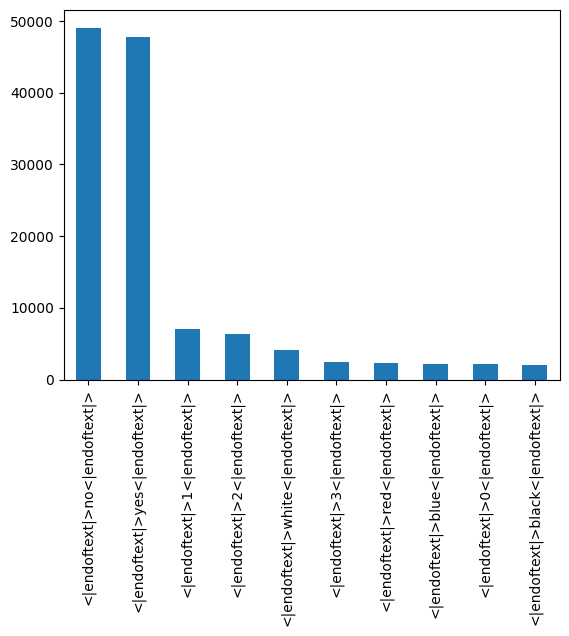

In [ ]:
import pandas as pd
pd.Series([t['answer'] for t in train_data]).value_counts().head(10).plot.bar()

In [ ]:
train_dataset = Dataset.from_dict({key: [item[key] for item in train_data] for key in train_data[0].keys()})
val_dataset = Dataset.from_dict({key: [item[key] for item in val_data] for key in val_data[0].keys()})
test_dataset = Dataset.from_dict({key: [item[key] for item in test_data] for key in test_data[0].keys()})

# Save datasets to disk (optional)
# train_dataset.save_to_disk("vqa_train_dataset")
# val_dataset.save_to_disk("vqa_val_dataset")

In [ ]:
image_feature_extractor.do_normalize = False  # controverisal pre-processing alteration

In [ ]:
def data_collator(batch, augment_image=True):
    # Preprocess and tokenize text
    text_inputs = [sample['question'] for sample in batch]
    text_tensors = text_tokenizer(text_inputs, padding=True, return_tensors="pt")

    # Augment + featurize image
    image_inputs = image_feature_extractor([preprocess_image(sample["image"], augment_image=augment_image) for sample in batch])
    image_tensors = torch.from_numpy(np.stack(image_inputs['pixel_values']))

    # Prepare decoder inputs (targets)
    target_inputs = [sample["answer"] for sample in batch]
    target_tensors = decoder_tokenizer(target_inputs, padding=True, return_tensors="pt")

    # Return input tensors
    labels = target_tensors["input_ids"].clone()
    # mask the loss on the pad tokens to not confuse the model into thinking it needs to generate pad tokens
    labels = torch.where((labels == decoder_tokenizer.pad_token_id), -100, labels)
    labels[:, -1] = decoder_tokenizer.eos_token_id

    return {
        "input_text": text_tensors["input_ids"].to(device),
        "attention_mask": text_tensors["attention_mask"].to(device),
        "input_image": image_tensors.to(device),
        "decoder_input_ids": target_tensors["input_ids"].to(device),
        "labels": labels.to(device)
    }

for i, d in enumerate(train_data):
    if len(d['answer']) > (len(train_data[0]['answer']) + 10):
        print([train_data[0]['answer'], train_data[i]['answer']])

        batch = data_collator([train_data[0], train_data[i]])
        print(batch['decoder_input_ids'])

        print(batch['labels'])
        break

['<|endoftext|>yes<|endoftext|>', '<|endoftext|>de anza college<|endoftext|>']
tensor([[50256, 50256, 50256, 50256,  8505, 50256],
        [50256,  2934,   281,  4496,  4152, 50256]], device='cuda:0')
tensor([[ -100,  -100,  -100,  -100,  8505, 50256],
        [ -100,  2934,   281,  4496,  4152, 50256]], device='cuda:0')


In [ ]:
training_args = TrainingArguments(
    output_dir="./vqa_custom",
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=128,
    gradient_accumulation_steps=2,
    evaluation_strategy="epoch",
    logging_steps=10,
    fp16=True,  # only possible if using a GPU
    save_strategy='epoch',
    report_to='wandb',
    warmup_ratio=0.1,
    learning_rate=2e-5,
    lr_scheduler_type='cosine',
    save_total_limit=1,
    save_safetensors=False,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
)

class CustomTrainer(Trainer):
    def __init__(self, *args, train_dataloader=None, eval_dataloader=None, test_dataloader=None, **kwargs):
        super().__init__(*args, **kwargs)
        self._train_dataloader = train_dataloader
        self._eval_dataloader = eval_dataloader
        self._test_dataloader = test_dataloader

    def get_train_dataloader(self):
        if self._train_dataloader is not None:
            return self._train_dataloader
        return super().get_train_dataloader()

    def get_eval_dataloader(self, dataset=None):
        if self._eval_dataloader is not None:
            return self._eval_dataloader
        return super().get_eval_dataloader(dataset)

    def get_test_dataloader(self, dataset=None):
        if self._test_dataloader is not None:
            return self._test_dataloader
        return super().get_test_dataloader(dataset)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
model = MultiModalModel(
    image_encoder_model=IMAGE_ENCODER_MODEL, text_encoder_model=TEXT_ENCODER_MODEL,
    decoder_model=DECODER_MODEL, freeze='nothing')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vitb16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['transformer.h.0.crossattention.c_attn.bias', 'transformer.h.0.crossattention.c_attn.weight', 'transformer.h.0.crossattention.c_proj.bias', 'transformer.h.0.crossattention.c_proj.weight', 'transformer.h.0.crossattention.q_attn.bias', 'transformer.h.0.crossattention.q_attn.weight', 'transformer.h.0.ln_cross_attn.bias', 'transformer.h.0.ln_cross_attn.weight', 'transformer.h.1.crossattention.c_attn.bias', 'transformer.h.1.crossattention.c_attn.weight', 'transformer.h.1.crossattention.c_proj.bias', 'transformer.h.1.crossattention.c_proj.weight', 'transformer.h.1.crossattention.q_attn.bias', 'transformer.h.1.crossattention.q_attn.weight', 'transformer.h.1.ln_cross_attn.bias', 'transformer.h.1.ln_cross_attn.weight', 'transformer.h.10.crossattention.c_attn.bias', 'transformer.h.10.crossattention.c_attn.weight', 'transformer.h.10.crossattention.c_proj.bias', 'transformer.h.10.cros

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_trainable_params = count_trainable_parameters(model)
print(f"Number of trainable parameters: {num_trainable_params:,}")

Number of trainable parameters: 306,739,968


In [ ]:
from transformers import Trainer, TrainingArguments
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    train_dataset, batch_size=training_args.per_device_train_batch_size,
    collate_fn=data_collator, shuffle=True,
)
eval_dataloader = DataLoader(
    val_dataset, batch_size=training_args.per_device_eval_batch_size,
    collate_fn=lambda x: data_collator(x, augment_image=False)
)
test_dataloader = DataLoader(
    test_dataset, batch_size=training_args.per_device_eval_batch_size,
    collate_fn=lambda x: data_collator(x, augment_image=False)
)

# Use the CustomTrainer class
trainer = CustomTrainer(
  model=model,
       args=training_args,
       train_dataloader=train_dataloader,
       eval_dataset=val_dataset,  # Burada eval_dataset'i sağlıyoruz
       eval_dataloader=eval_dataloader
)

In [ ]:
assert model.text_encoder.device == model.image_encoder.device == model.decoder.device

answer || <|endoftext|>yes<|endoftext|>
decoder_input_ids tensor([[50256,  8505, 50256]], device='cuda:0')


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


model ouput ids tensor([[198,  11, 464]], device='cuda:0')
tensor(8.7101, device='cuda:0', grad_fn=<NllLossBackward0>)


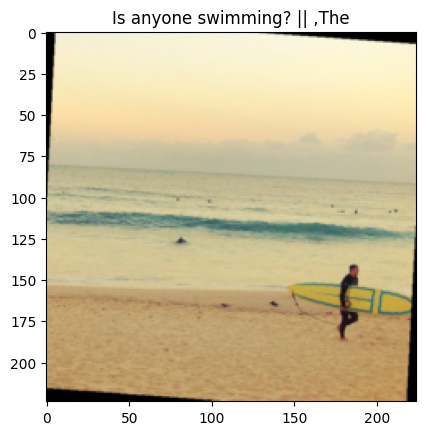

In [ ]:
v = test_dataset[1]
batch = data_collator([v])
print('answer ||', v['answer'])
print('decoder_input_ids', batch['decoder_input_ids'])
model_output = model(**batch)
output_ids = torch.argmax(model_output.logits, dim=-1)
print('model ouput ids', output_ids)
# Decode the token IDs into text
decoded_output = decoder_tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
print(model_output.loss)
# show input_image
plt.imshow(batch['input_image'][0].cpu().permute(1, 2, 0))
plt.title(f'{v["question"]} || {decoded_output}')
plt.show()

In [ ]:
trainer.evaluate()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ahmetyildirir1 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'eval_loss': 9.354158401489258,
 'eval_model_preparation_time': 0.012,
 'eval_runtime': 164.5106,
 'eval_samples_per_second': 129.317,
 'eval_steps_per_second': 1.015}

In [ ]:
def generate_datapoint(datapoint, model, decoder_tokenizer, verbose=False):

    image, generated_answer = model.generate(
        datapoint['image'], [datapoint['question']],
        max_text_length=5, verbose=verbose
        )
    decoded_answer = datapoint['answer'].replace(decoder_tokenizer.bos_token, '').replace(decoder_tokenizer.eos_token, '').strip()
    return dict(
        generated_answer=generated_answer, answer=decoded_answer, correct=generated_answer == decoded_answer
        )

def test_model(model, decoder_tokenizer, test_dataset, verbose=False):
    results = []

    for datapoint in tqdm(test_dataset):
        results.append(generate_datapoint(datapoint, model, decoder_tokenizer, verbose=verbose))
    return results

In [ ]:
results = test_model(model, decoder_tokenizer, test_dataset.select(range(100)), verbose=False)
pd.DataFrame(results)['correct'].value_counts(normalize=True)

100%|██████████| 100/100 [00:09<00:00, 10.13it/s]


,proportion
correct,
False,1.0


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Model Preparation Time
1,0.749500,0.759641,0.012000


Aşağıdaki örnek kod, modelinizi kullanarak bir resim üzerinde soru sorup tahmin yapmanızı gösteriyor. Bu örnekte, modelin `generate` fonksiyonu kullanılarak, verilen bir resim ve soru üzerinden cevap üretiliyor.

```python
# Örnek: Kendi resminiz ve sorunuz ile tahmin yapma

# Resim dosyasının yolunu belirtin (örneğin, "sample_image.jpg")
sample_image_path = "sample_image.jpg"

# Sorunuzu belirleyin
sample_question = "What does the sign say?"

# Modelin generate fonksiyonunu kullanarak cevap üretimi yapıyoruz.
# max_text_length, üretilen cevabın maksimum token sayısını belirler.
# verbose=True ise adım adım çıktı bilgilerini gösterir.
image, generated_answer = model.generate(
    sample_image_path,
    [sample_question],
    max_text_length=10,  # Cevap uzunluğu, ihtiyaca göre ayarlanabilir.
    verbose=True
)

# Sonucu ekrana yazdırıyoruz.
print("Soru:", sample_question)
print("Üretilen Cevap:", generated_answer)

# İsterseniz resmi de görselleştirebilirsiniz:
import matplotlib.pyplot as plt
from PIL import Image

# Resmi aç ve göster
img = Image.open(sample_image_path)
plt.imshow(img)
plt.title(f"Question: {sample_question} || Answer: {generated_answer}")
plt.axis('off')
plt.show()


In [ ]:
test_dataset

In [ ]:
results = test_model(model, decoder_tokenizer, test_dataset, verbose=False)
pd.DataFrame(results)['correct'].value_counts(normalize=True)

In [ ]:
pd.DataFrame(results)['correct'].value_counts(normalize=True)

In [ ]:
pd.DataFrame(results)

In [ ]:
trainer.save_model()

In [ ]:
from huggingface_hub import HfFolder, notebook_login
notebook_login()

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!git lfs install

!GIT_LFS_SKIP_SMUDGE=1

!git clone https://huggingface.co/profoz/quick-start-llm-vqa

!cp /content/vqa_custom/pytorch_model.bin /content/quick-start-llm-vqa/
!cp /content/vqa_custom/training_args.bin /content/quick-start-llm-vqa/

In [ ]:
%cd /content/quick-start-llm-vqa/
!git config --global user.email "sinan.u.ozdemir@gmail.com"
!git config --global user.name "Sinan Ozdemir"
!git add .
!git commit -m "New VQA custom model"
!git push